Populating the interactive namespace from numpy and matplotlib


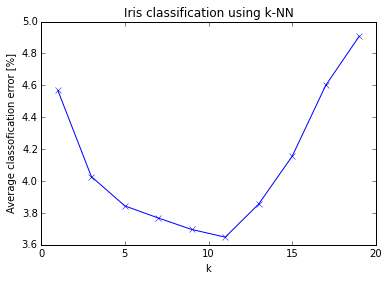

In [6]:
%pylab inline

from numpy import argsort, array, column_stack, random
from scipy import stats
from sklearn import datasets

def kNN(k, test_point, training_points, training_labels):
    distances = ((training_points - test_point)**2).sum(axis=1)
    indices = argsort(distances)
    return stats.mode(array([training_labels[index] for index in indices[:k]]))[0][0]

iris = datasets.load_iris()
iris_set = column_stack((iris.data, iris.target))

errors = array([0]*10)
sample_size = int(round(len(iris_set) * 0.666))
test_size = len(iris_set) - sample_size
tries = 500
for i in range(tries):
    random.shuffle(iris_set)
    training_set, test_set = iris_set[:sample_size], iris_set[sample_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classofication error [%]')
title('Iris classification using k-NN')